# Win Loss Analysis for Sales Forecasting Model 

In [2]:
##############################################
# Title: Win Loss Analysis for Sales Forecasting Model
##############################################

"""
Sales Forecasting -
    One of the planning usecases to figure out what could be the potential sales and revenue opportunity coming out of the
    new business models. 
    Current usecase is analysing IBM dataset to predict Win or Loss of a deal and also calculating probability of winning.
    Steps covered :
    1.	Read excel file and perform Exploratory Data Analysis (EDA) to know the relationship between features and response values.
    2.  Clean and prepare the data
        a.	Convert categorical data into numerics
        b.  Check for correlation between features and remove unwanted/highly correlated features from dataset.
    3.  Perform Feature Selection techniqu like - Dimensionality Reduction technique to get the desired features.
        a. Apply Principal Component Analysis technique 
    5.  Predicting win or loss using classification-
        a.  Split the dataset into test data and training data
        b.  Train model using diff classification algorithms
        c.  Get Accuracy of each model
    6.	Treating the same model for regression and predicting probability of win. Here since the 
        training data will have 0/1 as Win/Loss, model will regress between 0 and 1 and giving us probability
        a.  Split the dataset into test data and training data
        b.  Train model using diff regression algorithms
        c.  Get Accuracy of each model(used 50% as a threshold value for difference between actual and predicted value)
        d.	Cap the predicted probability values to be between 5% to 90%.
"""

'\nSales Forecasting -\n    One of the planning usecases to figure out what could be the potential sales and revenue opportunity coming of the\n    new business models. \n    Current usecase is analysing IBM dataset to predict Win or Loss of a dal and also probability of winning.\n    Steps covered :\n    1.\tRead excel file and perform Exploratory Data Analysis (EDA) to know the relationship between features and response values.\n    2.  Clean and prepare the data\n        a.\tConvert categorical data into numerics\n        b.  Check for correlation between features and remove unwanted/highly correlated features from dataset.\n    3.  Perform Feature Selection techniqu like - Dimensionality Reduction technique to get the desired features.\n        a. Apply Principal Component Analysis technique \n    5.  Predicting win or loss using classification-\n        a.  Split the dataset into test data and training data\n        b.  Train model using diff classification algorithms\n        c. 

 ## Import Required Libraries

In [12]:
import pandas as pd
from sklearn import linear_model
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
#import pandas.rpy.common as com
import seaborn as sns
%matplotlib inline

from sklearn.svm import SVC
from sklearn import svm
from sklearn import linear_model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics


## Helper Functions for Cleaning dataset

In [5]:
#Get categorical data 
def get_categorical_values(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(exclude=numerics) 

#Get Numerical data 
def get_numerical_values(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    return df.select_dtypes(include=numerics)

#Convert textual data to numerical values
def encode_categorical_data(df):
    categorical_cols = get_categorical_values(df)
    df.update(categorical_cols.apply(LabelEncoder().fit_transform))
    if len(categorical_cols)>0:
        for col in categorical_cols:
            df[col] = df[col].astype('category')
    return df

#Visualise the dataset
#Get Correlation between numerical variables
def get_correlation_btwn_features(df):
    numerical_data = get_numerical_values(df)
    corr = numerical_data.corr()  
    fig, ax = plt.subplots()
    sns.heatmap(corr)
    print('Heatmap describing about CORRELATION between features')
    print('The whitish portion has maximum correlation')
    plt.show()
    return corr.abs()

#Remove the features which are highly correlated with each other 
def remove_highly_correlated_cols(df):
    corr  = get_correlation_btwn_features(df)
    # Select upper triangle of correlation matrix
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    # Find index of feature columns with correlation greater than 0.90
    to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
    print(" Removing Highly correlated features -------- ", to_drop)
    print(" Cleaned Dataset ------------ ")
    df = df.drop(to_drop, axis = 1)
    return df

#Remove unwanted features and keep only desired ones. Fro ex - remove Opportunity Number/ID
def remove_unwanted_features(df):
    print("Removing unwanted feature -------> Opportunity Number")
    df = df.drop(['Opportunity Number'], axis = 1)
    return df

#Clean dataset by calling above functions    
def clean_dataset(df):    
    df = encode_categorical_data(df)
    df = remove_unwanted_features(df)
    df = remove_highly_correlated_cols(df)
    return df

## Helper Functions for Training and Predicting Model

In [35]:
##Predicting prob of winning values for each deal by using Multi variate LR 
def predict_Probability_of_Win(X, Y):
    #split training and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    regressors = [
       # svm.SVR(kernel="linear"),
        linear_model.TheilSenRegressor(),
        linear_model.BayesianRidge(),
        linear_model.LassoLars(),
       # linear_model.ARDRegression(),
        linear_model.LinearRegression(),
        LogisticRegression()
        ]


    regressor_names = [ #"Support Vector Regressor",
                        "TheilSen Regressor", 
                        "Ridge Regression", 
                        "Lasso Regression",
                        #"ARD Regression", 
                        "LinearRegression",
                        "Logisitc Regression"
    ]

    accuracy_list = []
    print("Treating this as a regression problem, predicting the probability of winning a deal :")
    print(" REGRESSION MODEL:ACCURACY")
    for i in range(len(regressors)):
        clf = regressors[i]
        # build the model on training data
        clf.fit(X_train, Y_train)
        # make predictions for test data
        Y_pred = clf.predict(X_test)    
        accuracy = get_regr_accuracy(Y_test.values, Y_pred)
        print(regressor_names[i], ":", accuracy)
        accuracy_list.append(accuracy)
   
    max_accuracy_index = accuracy_list.index(max(accuracy_list))
    print("Max accuracy is ", max(accuracy_list), " from-------", regressor_names[max_accuracy_index], " algo")
    
##Categorising observations into Win or Loss by using  classification algorithm        
def predict_Win_Loss(X, Y):
    #split training and test data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    classifiers = [
        #svm.SVC(kernel="linear"),
        #svm.SVC(kernel="rbf"),
        GradientBoostingClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        LinearDiscriminantAnalysis(),
        LogisticRegression(),
        KNeighborsClassifier(),
        GaussianNB(),
        BaggingClassifier()
    ]

    classifier_names = [ 
            #"SVM with linear kernel",
            #"SVM with RBF kernel",
            "GradientBoostingClassifier",
            "DecisionTreeClassifier",
            "RandomForestClassifier",
            "LinearDiscriminantAnalysis",
            "LogisticRegression",
            "KNeighborsClassifier",
            "GaussianNB",
            "BaggingClassifier"
    ]

    accuracy_list = []
    confusion_matrix_list = []
    print("Treating this as a classification problem, by classifying the results as a Win/Loss : ")
    print(" CLASSIFICATION MODEL:ACCURACY")
    for i in range(len(classifiers)):
        clf = classifiers[i]
        # build the model on training data
        clf.fit(X_train, Y_train)
        # make predictions for test data
        Y_pred = clf.predict(X_test)
        accuracy = accuracy_score(Y_test.values, Y_pred)
        confusion_matrix_list.append(confusion_matrix(Y_test, Y_pred))
        print(classifier_names[i], ":", accuracy)
        accuracy_list.append(accuracy)
    
    max_accuracy_index = accuracy_list.index(max(accuracy_list))
    print("Max accuracy is ", max(accuracy_list), " from-------", classifier_names[max_accuracy_index], " algo")
    cm = confusion_matrix_list[max_accuracy_index]
    labels = ["Win", "Loss"]
    plot_confusion_matrix(cm, classes=labels)
    #print("CLASSIFICATION REPORT ---------")
    #print(metrics.classification_report(Y_test.values, Y_pred, target_names = labels))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
## Get Linear Regression accuracy
def get_regr_accuracy(test_data, pred_data):
    threshold = 0.5
    count = 0
    for p_index in range(len(test_data)):
        if abs(test_data[p_index] - pred_data[p_index]) < threshold:
            count += 1
    return (count * 1.0)/len(test_data)

## Cap probability of winning values between 5% and 90%
def cap_values(p):
    lower_threshold = 0.05
    upper_threshold = 0.9
    if (p > upper_threshold) :
       return upper_threshold
    elif (p < lower_threshold):
       return lower_threshold
    else:
       return p


In [4]:
#Read the data set
    data = pd.read_excel("Sales-Win-Loss-dataset.xlsx", header=0)
    data.columns

Index(['Opportunity Number', 'Supplies Group', 'Supplies Subgroup', 'Region',
       'Route To Market', 'Elapsed Days In Sales Stage',
       'Sales Stage Change Count', 'Total Days Identified Through Closing',
       'Total Days Identified Through Qualified', 'Opportunity Amount USD',
       'Client Size By Revenue (USD)', 'Client Size By Employee Count',
       'Revenue From Client Past Two Years (USD)', 'Competitor Type',
       'Ratio Days Identified To Total Days',
       'Ratio Days Validated To Total Days',
       'Ratio Days Qualified To Total Days', 'Deal Size Category (USD)',
       'Opportunity Result'],
      dtype='object')

In [47]:
#EDA Helper Function
def plot_top_n_query(df, n, x_axis, y_axis):
    df = df.nlargest(n , y_axis)
    df.plot.bar(x=x_axis, y=y_axis, rot=15)

## Perform EDA/Visualizations 

GET TOP 5 REGIONS BASED ON OPPORTUNITY AMOUNT


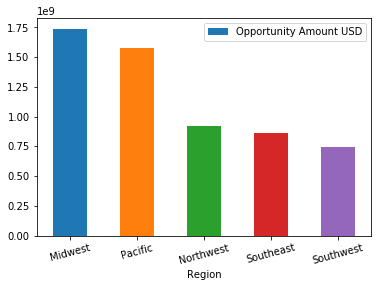

In [209]:
print("GET TOP 5 REGIONS BASED ON OPPORTUNITY AMOUNT")
regions = data.groupby(['Region'])['Opportunity Amount USD'].sum().reset_index(name='Opportunity Amount USD')
plot_top_n_query(regions, 5, 'Region', 'Opportunity Amount USD')
#regions.plot.bar(y=['Win', 'Loss'], rot=15)


COMPARE REGIONS WITH OPPORTUNITY AMOUNT and OPPORTUNITY RESULT


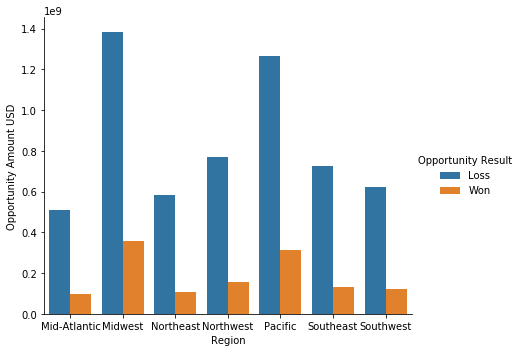

In [210]:
print("COMPARE REGIONS WITH OPPORTUNITY AMOUNT and OPPORTUNITY RESULT")
regions = data.groupby(['Region','Opportunity Result'], as_index=True)['Opportunity Amount USD'].sum().reset_index(name='Opportunity Amount USD')
sns.catplot(x = "Region", y = 'Opportunity Amount USD', kind="bar", data = regions, hue = "Opportunity Result", aspect=1.2);

SUPPLIES SUBGROUP ACROSS Total Days Identified Through Qualified , AMOUNT AND RESULT
As Total Days Identified Through Qualified increases, we start losing deals ---- 


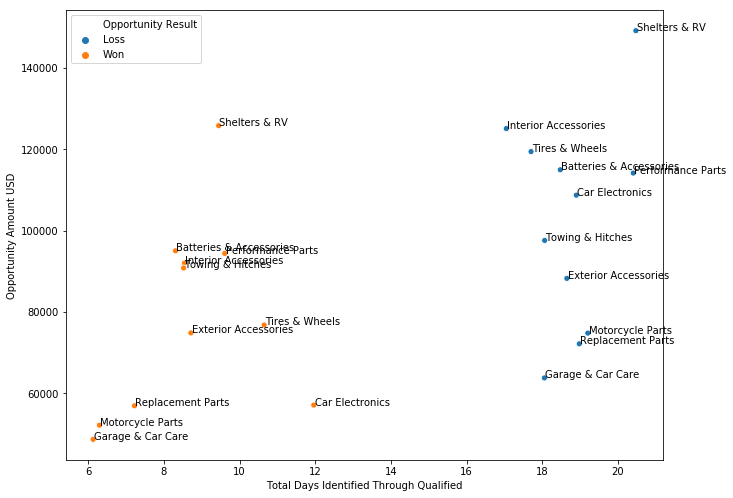

In [211]:
print("SUPPLIES SUBGROUP ACROSS Total Days Identified Through Qualified , AMOUNT AND RESULT")
print("As Total Days Identified Through Qualified increases, we start losing deals ---- ")
fig, ax = plt.subplots()
fig.set_size_inches(10.7, 8.27)
regions = data.groupby(['Supplies Subgroup',"Opportunity Result"], as_index=True)['Total Days Identified Through Qualified','Opportunity Amount USD'].mean().reset_index()
sns.scatterplot(x = "Total Days Identified Through Qualified", y = 'Opportunity Amount USD', data = regions,
                hue = "Opportunity Result");

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(regions["Total Days Identified Through Qualified"], regions['Opportunity Amount USD'], regions['Supplies Subgroup'], plt.gca())

WIN PERCENTAGE PER SALES REP/REGION


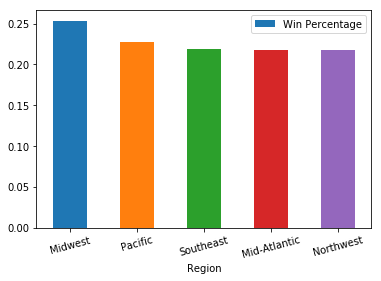

In [49]:
print("WIN PERCENTAGE PER SALES REP/REGION")
won_deals_per_region = data.groupby('Region')['Opportunity Result'].apply(lambda x: (x=='Won').sum()).reset_index(name='No. of Won Deals')
total_deals_per_region = data.groupby('Region')['Opportunity Result'].count().reset_index(name='Total Deals')
win_percent_per_region = (won_deals_per_region['No. of Won Deals']/total_deals_per_region['Total Deals']).reset_index(name='Win Percentage')
win_percent_per_region['Region'] = total_deals_per_region['Region']

plot_top_n_query(win_percent_per_region, 5, 'Region', 'Win Percentage')

GET TOP 2 SUPPLIES GROUPS BASED ON NO. OF WON DEALS


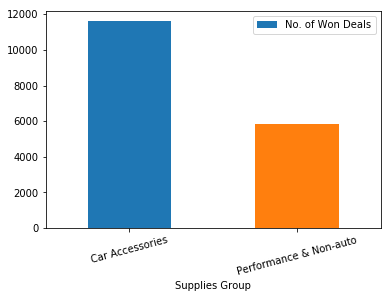

In [213]:
print("GET TOP 2 SUPPLIES GROUPS BASED ON NO. OF WON DEALS")
won_deals_per_supplies_group = data.groupby('Supplies Group')['Opportunity Result'].apply(lambda x: (x=='Won').sum()).reset_index(name='No. of Won Deals')
plot_top_n_query(won_deals_per_supplies_group, 2, 'Supplies Group', 'No. of Won Deals')

GET TOP 5 SUPPLY SUBGROUPS BASED ON NO. OF WON DEALS


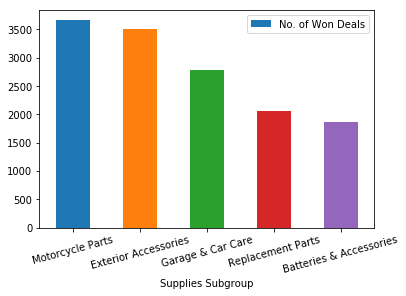

In [214]:
print("GET TOP 5 SUPPLY SUBGROUPS BASED ON NO. OF WON DEALS")
won_deals_per_supplies_sub_group = data.groupby('Supplies Subgroup')['Opportunity Result'].apply(lambda x: (x=='Won').sum()).reset_index(name='No. of Won Deals')

plot_top_n_query(won_deals_per_supplies_sub_group, 5, 'Supplies Subgroup', 'No. of Won Deals')


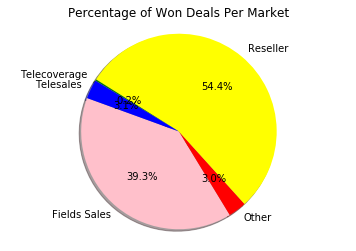

In [215]:
route_to_market = data.groupby('Route To Market')['Opportunity Result'].apply(lambda x: (x=='Won').sum()).reset_index(name='No. of Won Deals')
values = route_to_market["No. of Won Deals"].apply(lambda r: (r/route_to_market["No. of Won Deals"].sum())*100)

labels = route_to_market['Route To Market'].values
colors = ['Pink', 'Red', 'Yellow', 'Green', 'Blue']

plt.pie(values, colors=colors, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.title('Percentage of Won Deals Per Market')
plt.show()


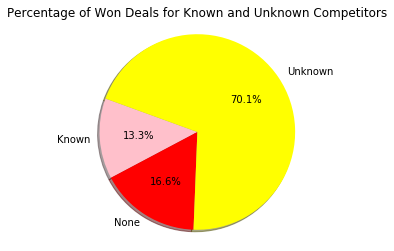

In [216]:
competitor = data.groupby('Competitor Type')['Opportunity Result'].apply(lambda x: (x=='Won').sum()).reset_index(name='No. of Won Deals')
values = competitor["No. of Won Deals"].apply(lambda r: (r/competitor["No. of Won Deals"].sum())*100)

labels = competitor['Competitor Type'].values
sizes = competitor
colors = ['Pink', 'Red', 'Yellow', 'Green', 'Blue']

plt.pie(values, colors=colors, labels = labels, autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.title('Percentage of Won Deals for Known and Unknown Competitors')
plt.show()


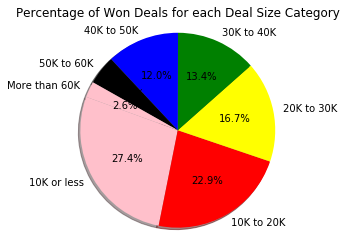

In [217]:
deal_size = data.groupby('Deal Size Category (USD)')['Opportunity Result'].apply(lambda x: (x=='Won').sum()).reset_index(name='No. of Won Deals')
values = deal_size["No. of Won Deals"].apply(lambda r: (r/deal_size["No. of Won Deals"].sum())*100)

labels = deal_size['Deal Size Category (USD)'].values
sizes = deal_size
colors = ['Pink', 'Red', 'Yellow', 'Green', 'Blue', 'Black']

plt.pie(values, colors=colors, labels = labels, autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis('equal')
plt.title('Percentage of Won Deals for each Deal Size Category')
plt.show()


Removing unwanted feature -------> Opportunity Number
Heatmap describing about CORRELATION between features
The whitish portion has maximum correlation


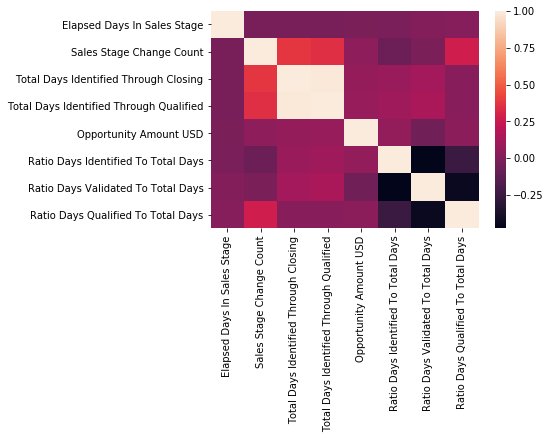

 Removing Highly correlated features --------  ['Total Days Identified Through Qualified']
 Cleaned Dataset ------------ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 17 columns):
Supplies Group                              78025 non-null category
Supplies Subgroup                           78025 non-null category
Region                                      78025 non-null category
Route To Market                             78025 non-null category
Elapsed Days In Sales Stage                 78025 non-null int64
Sales Stage Change Count                    78025 non-null int64
Total Days Identified Through Closing       78025 non-null int64
Opportunity Amount USD                      78025 non-null int64
Client Size By Revenue (USD)                78025 non-null category
Client Size By Employee Count               78025 non-null category
Revenue From Client Past Two Years (USD)    78025 non-null category
Competitor Type                  

In [9]:
#Cleaning dataset
cleaned_data = clean_dataset(data.copy())
cleaned_data.info()

In [10]:
#Get the desired feature columns
X = cleaned_data.iloc[:, :16]
#Get the output column 
Y = cleaned_data.iloc[:, 16:]

Treating this as a classification problem, by classifying the results as a Win/Loss : 
 CLASSIFICATION MODEL:ACCURACY
GradientBoostingClassifier : 0.8722658920027341
DecisionTreeClassifier : 0.8331766917293233
RandomForestClassifier : 0.8685492139439508
LinearDiscriminantAnalysis : 0.8175837320574163
LogisticRegression : 0.7783236500341764
KNeighborsClassifier : 0.8137388926862611
GaussianNB : 0.7783236500341764
BaggingClassifier : 0.8705143540669856
Max accuracy is  0.8722658920027341  from------- GradientBoostingClassifier  algo


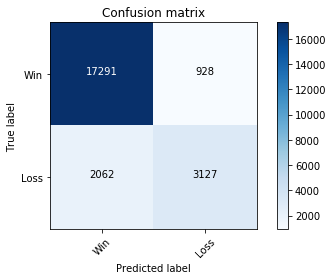

In [36]:
predict_Win_Loss(X, Y)

In [37]:
predict_Probability_of_Win(X, Y)


Treating this as a regression problem, predicting the probability of winning a deal :
 REGRESSION MODEL:ACCURACY
TheilSen Regressor : 0.8093814080656186
Ridge Regression : 0.8160457963089542
Lasso Regression : 0.7772556390977443
LinearRegression : 0.8162166780587833
Logisitc Regression : 0.7772556390977443
Max accuracy is  0.8162166780587833  from------- LinearRegression  algo


In [28]:
#Dimensionality Reduction using PCA 
pca  = PCA()
X_pca = pca.fit_transform(X)
#The total variance is the sum of variances of all individual principal components.
explained_variance = pca.explained_variance_ratio_
print(" Variance between features ------- : " , explained_variance)

 Variance between features ------- :  [9.99999943e-01 3.98820169e-08 1.57014434e-08 4.48271144e-10
 2.04213485e-10 1.11838659e-10 8.45786907e-11 7.03430969e-11
 5.32408804e-11 4.62509905e-11 3.92160058e-11 3.60646790e-11
 2.73034029e-11 1.38667768e-11 7.66891276e-12 1.56369629e-12]


Treating this as a classification problem, by classifying the results as a Win/Loss : 
 CLASSIFICATION MODEL:ACCURACY
GradientBoostingClassifier : 0.867822966507177
 CLASSIFICATION MODEL:ACCURACY
DecisionTreeClassifier : 0.8184808612440191
 CLASSIFICATION MODEL:ACCURACY
RandomForestClassifier : 0.8643198906356802
 CLASSIFICATION MODEL:ACCURACY
LinearDiscriminantAnalysis : 0.8195915926179084
 CLASSIFICATION MODEL:ACCURACY
LogisticRegression : 0.8218984962406015
 CLASSIFICATION MODEL:ACCURACY
KNeighborsClassifier : 0.8105775803144224
 CLASSIFICATION MODEL:ACCURACY
GaussianNB : 0.7722146274777854
 CLASSIFICATION MODEL:ACCURACY
BaggingClassifier : 0.8606459330143541
Max accuracy is  0.867822966507177  from------- GradientBoostingClassifier  algo


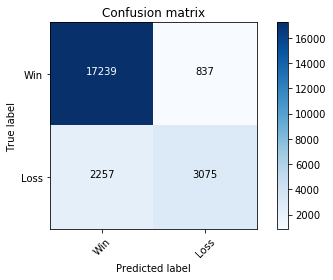

In [29]:
predict_Win_Loss(X_pca, Y)

In [30]:
predict_Probability_of_Win(X_pca, Y)

Treating this as a regression problem, predicting the probability of winning a deal :
 REGRESSION MODEL:ACCURACY
TheilSen Regressor : 0.8073735475051265
 REGRESSION MODEL:ACCURACY
Ridge Regression : 0.8150632262474368
 REGRESSION MODEL:ACCURACY
Lasso Regression : 0.7758458646616542
 REGRESSION MODEL:ACCURACY
LinearRegression : 0.8151486671223513
 REGRESSION MODEL:ACCURACY
Logisitc Regression : 0.8228383458646616
Max accuracy is  0.8228383458646616  from------- Logisitc Regression  algo
